In [ ]:
# https://bigml.com/user/czuriaga/gallery/dataset/5559c2c6200d5a6570000084#info
# http://www.michelecoscia.com/?page_id=379
# Lift in data mining
# https://en.wikipedia.org/wiki/Lift_(data_mining)

In [1]:
import pandas as pd
import os
import numpy as np

import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

#from sklearn.cross_validation import train_test_split

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data = data.dropna()

In [60]:
data.shape
num_customers = data.shape[0]

In [5]:
data.head()

,customer_id,avg_distance_to_shops,min_distance_to_shops,max_distance_to_shops,products_purchased,unique_products_purchased,amount_purchased,avg_purchase,avg_price,shops_used,...,avg_purchase_shop_1,avg_purchase_shop_2,avg_purchase_shop_3,avg_purchase_shop_4,avg_purchase_shop_5,avg_price_shop_1,avg_price_shop_2,avg_price_shop_3,avg_price_shop_4,avg_price_shop_5
0,1,1434.91910,985.87620,4082.5222,3090,473,7551.701,14.221659,3.150493,2,...,10.441143,14.862848,0.000000,0,0.000000,6.393403,2.600485,0.000000,0,0.000000
1,2,909.76764,254.94832,2295.4840,4508,486,7820.219,11.235947,2.191422,4,...,3.761943,4.848720,2.546600,0,16.479185,2.851152,2.009863,2.059450,0,2.103394
2,3,1498.94700,754.29560,2831.7727,814,234,1788.613,5.453088,2.258994,4,...,3.757062,5.605183,1.923385,0,5.924268,3.426687,2.478529,1.923385,0,1.947067
3,4,561.65900,362.79178,2210.3820,648,208,1679.520,5.976940,2.614292,4,...,4.997400,2.688400,5.029184,0,7.156351,4.997400,2.688400,2.083168,0,2.754427
4,5,605.36280,275.46753,1375.1184,13,10,17.922,1.792200,1.692000,2,...,0.000000,0.967667,2.145571,0,0.000000,0.000000,0.633667,2.145571,0,0.000000


In [6]:
data.columns.values

array(['customer_id', 'avg_distance_to_shops', 'min_distance_to_shops',
       'max_distance_to_shops', 'products_purchased',
       'unique_products_purchased', 'amount_purchased', 'avg_purchase',
       'avg_price', 'shops_used', 'distance_shop_1', 'distance_shop_2',
       'distance_shop_3', 'distance_shop_4', 'distance_shop_5',
       'products_purchased_shop_1', 'products_purchased_shop_2',
       'products_purchased_shop_3', 'products_purchased_shop_4',
       'products_purchased_shop_5', 'unique_products_purchased_shop_1',
       'unique_products_purchased_shop_2',
       'unique_products_purchased_shop_3',
       'unique_products_purchased_shop_4',
       'unique_products_purchased_shop_5', 'amount_purchased_shop_1',
       'amount_purchased_shop_2', 'amount_purchased_shop_3',
       'amount_purchased_shop_4', 'amount_purchased_shop_5',
       'avg_purchase_shop_1', 'avg_purchase_shop_2', 'avg_purchase_shop_3',
       'avg_purchase_shop_4', 'avg_purchase_shop_5', 'avg_price_sho

In [42]:
list_purchase = []
for k in range(1,6):
    text_ = 'avg_purchase_shop_' + str(k)
    aux_ = data[text_].sum()/1000.
    print k , aux_
    list_purchase.append(aux_)
dfAux = pd.DataFrame()
dfAux['Store Number'] = [1,2,3,4,5]
dfAux['Avg. Purchase in Shop'] = list_purchase

1 488.909298102
2 300.282317291
3 91.7812933678
4 45.6972056429
5 48.7839356839


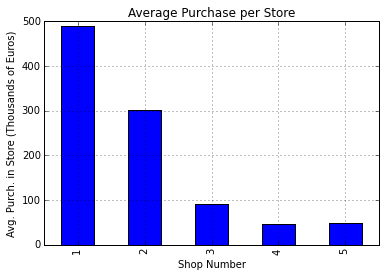

In [43]:
dfAux.plot(x='Store Number',y='Avg. Purchase in Shop',kind='bar',
           title='Average Purchase per Store',legend=False,grid=True)
plt.xlabel('Shop Number')
plt.ylabel('Avg. Purch. in Store (Thousands of Euros)')
plt.show()

In [70]:
list_purchase = []
for k in range(1,6):
    #text_ = 'avg_purchase_shop_' + str(k)
    aux_ = sum(data['shops_used']== k)
    perc_ = (float(aux_)/float(num_customers))*100
    print k , perc_
    list_purchase.append(perc_)
dfAux = pd.DataFrame()
dfAux['Number of Shops Used'] = [1,2,3,4,5]
dfAux['Percentage of Customers'] = list_purchase

1 19.3986581628
2 40.3578232419
3 25.9686904663
4 11.3890499462
5 2.88577818272


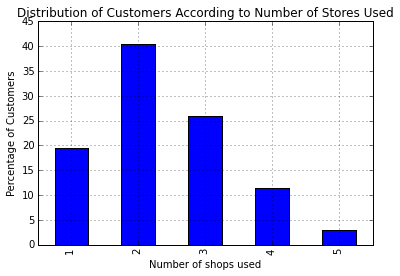

In [71]:
dfAux.plot(x='Number of Shops Used',y='Percentage of Customers',kind='bar',
           title='Distribution of Customers According to Number of Stores Used',
           legend=False,grid=True)
plt.xlabel('Number of shops used ')
plt.ylabel('Percentage of Customers')
plt.show()

In [73]:
quartiles = np.percentile(data.amount_purchased.values,np.arange(0,100,25))
quartiles

array([  2.12000000e-01,   6.53107000e+02,   2.35513800e+03,
         6.05463100e+03])